In [70]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [71]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=780,n_features=5,centers=3)

In [72]:
x

array([[ -4.06026962,   0.40162117,   2.23587629,  -4.26663262,
         -4.80644874],
       [ -8.35827865,  -0.64890036,   1.28782388,  -3.25909654,
         -2.13364802],
       [-10.3371271 ,   8.77022718,  -2.48263293,  -1.77291693,
         -6.41363034],
       ...,
       [ -9.12333117,   7.85858143,  -0.59403402,  -0.54192642,
         -6.70115257],
       [ -6.17914719,   0.19123733,   2.45813496,   5.17614221,
         -6.98233346],
       [ -7.71092419,   9.75146042,  -1.04916144,   0.80298931,
         -8.13559623]], shape=(780, 5))

In [73]:
y

array([0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1,
       2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1,

In [74]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)
x

array([[-0.20436236, -5.08631136],
       [-1.30243311, -5.69363857],
       [-5.59797599,  4.6718337 ],
       ...,
       [-3.27203339,  4.11618153],
       [ 6.45073876,  0.54926353],
       [-2.64546499,  6.57929932]], shape=(780, 2))

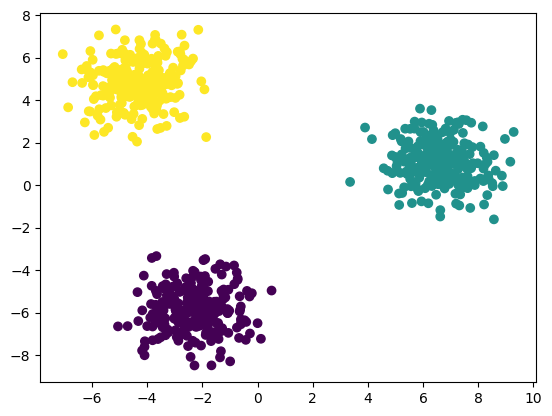

In [75]:
plt.scatter(x[:,0],x[:,1],c=y)

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=19)

---
<br><br>
Clustering is an unsupervised learning method, therefore, we don't have to deal with y_train and y_test or any y axis

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [78]:
from sklearn.cluster import KMeans

In [95]:
wcss=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(x_train_scaled)
    #pred=model.predict(x_test_scaled)
    withinClusterSumOfSquares=model.inertia_
    wcss.append(withinClusterSumOfSquares)

In [96]:
wcss

[1248.0000000000014,
 645.6654520311322,
 54.45445263328568,
 48.48486994819326,
 41.921273917502965,
 35.00889332982473,
 32.40003662555072,
 28.86298084706786,
 26.074512621367617,
 25.007916182730728]

Text(0, 0.5, 'Within Cluster Sum Of Squares')

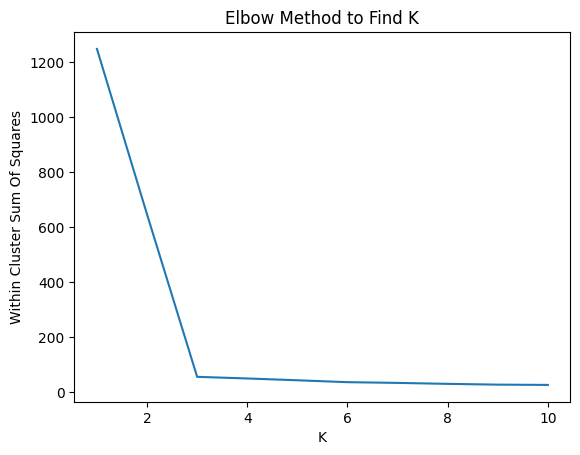

In [97]:
plt.plot([1,2,3,4,5,6,7,8,9,10],wcss)
plt.title('Elbow Method to Find K')
plt.xlabel('K')
plt.ylabel('Within Cluster Sum Of Squares')

In [98]:
#K=3
model=KMeans(n_clusters=3,init='k-means++')
model.fit(x_train_scaled)
pred=model.predict(x_test_scaled)

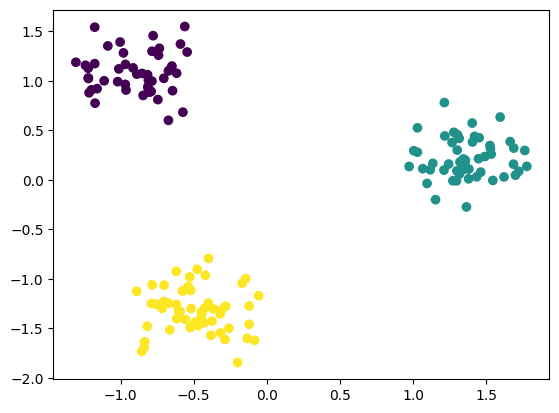

In [100]:
plt.scatter(x_test_scaled[:,0],x_test_scaled[:,1],c=pred)

In [101]:
!pip install kneed

In [102]:
from kneed import KneeLocator

In [111]:
KneeLocator([1,2,3,4,5,6,7,8,9,10],wcss,curve='convex',direction='decreasing').elbow

np.int64(3)

In [121]:
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,11):
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(x_train_scaled)
    scores.append(silhouette_score(x_train_scaled,model.labels_))

In [122]:
scores

[np.float64(0.558939848893426),
 np.float64(0.8396134152047942),
 np.float64(0.6518019246065706),
 np.float64(0.505327041905274),
 np.float64(0.4965389008906961),
 np.float64(0.32861689288239754),
 np.float64(0.33449986609142696),
 np.float64(0.33110579276208235),
 np.float64(0.3062547595413054)]

Text(0, 0.5, 'Silhoutte Score')

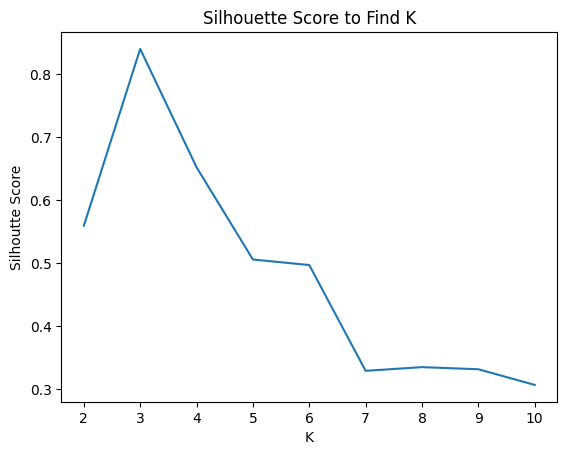

In [124]:
plt.plot([2,3,4,5,6,7,8,9,10],scores)
plt.title('Silhouette Score to Find K')
plt.xlabel('K')
plt.ylabel('Silhoutte Score')
#Peak is the actual K to be used